*Note to team* - you may need to install some packages first

In [1]:
# pip install folium         ## this is the only install I ended up needing 

# pip install shapely        ## installed these
# pip install geopandas

# pip install cartopy        ## unable to install
# pip install geoplot

### Import libraries, data and create the dataframe

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
# from shapely.geometry import Point, Polygon
# import geopandas as gpd
# from geopandas import GeoDataFrame
# import geoplot as gplt
import folium
from folium import plugins

In [3]:
# download the data
stations = pd.read_csv('https://data.ny.gov/api/views/i9wp-a4ja/rows.csv?accessType=DOWNLOAD&sorting=true')
stations.head()

,Division,Line,Station Name,Station Latitude,Station Longitude,Route1,Route2,Route3,Route4,Route5,...,Free Crossover,North South Street,East West Street,Corner,Entrance Latitude,Entrance Longitude,Station Location,Entrance Location,entrance_georeference,station_georeference
0,IND,Rockaway,Far Rockaway-Mott Av,40.603995,-73.755405,A,NaN,NaN,NaN,NaN,...,True,Beach 22nd St,Mott Ave,SW,40.604657,-73.754178,"(40.603995, -73.755405)","(40.604657, -73.754178)",POINT (-73.754178 40.604657),POINT (-73.755405 40.603995)
1,IND,Rockaway,Beach 25th St,40.600066,-73.761353,A,NaN,NaN,NaN,NaN,...,True,Beach 25th St,Rockaway Frwy,NW,40.599708,-73.761959,"(40.600066, -73.761353)","(40.599708, -73.761959)",POINT (-73.761959 40.599708),POINT (-73.761353 40.600066)
2,IND,Rockaway,Beach 25th St,40.600066,-73.761353,A,NaN,NaN,NaN,NaN,...,True,Beach 25th St,Rockaway Frwy,SW,40.599427,-73.761807,"(40.600066, -73.761353)","(40.599427, -73.761807)",POINT (-73.761807 40.599427),POINT (-73.761353 40.600066)
3,IND,Rockaway,Beach 25th St,40.600066,-73.761353,A,NaN,NaN,NaN,NaN,...,True,Beach 25th St,Rockaway Frwy,SW,40.599670,-73.761596,"(40.600066, -73.761353)","(40.59967, -73.761596)",POINT (-73.761596 40.59967),POINT (-73.761353 40.600066)
4,IND,Rockaway,Beach 36th St,40.595398,-73.768175,A,NaN,NaN,NaN,NaN,...,True,Beach 36th,Edgemere Ave,NE,40.595445,-73.768313,"(40.595398, -73.768175)","(40.595445, -73.768313)",POINT (-73.768313 40.595445),POINT (-73.768175 40.595398)


In [4]:
# eliminate unnecessary rows
station_locations = stations.drop(columns = stations.columns[5:], axis = 1).groupby('Station Name').mean()

In [5]:
station_locations.head()

,Station Latitude,Station Longitude
Station Name,,
103rd St,40.781165,-73.929092
104th St-102nd St,40.695178,-73.844330
104th St-Oxford Av,40.681711,-73.837683
110th St,40.795020,-73.944250
110th St-Central Park North,40.799075,-73.951822


### Basic scatter plot of all NYC stations

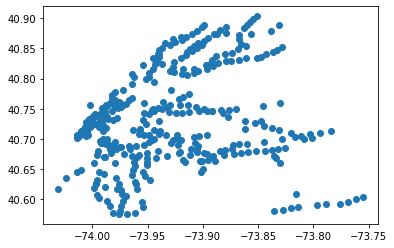

In [6]:
plt.scatter(x=station_locations['Station Longitude'], y=station_locations['Station Latitude'])
plt.show();

### Creating our empty map with folium
Source: https://www.kaggle.com/code/subinium/how-to-use-folium-geospatial-data/notebook

In [7]:
# this is the code for creating the map starting at a desired latitude/longitude - needed whenever creating a new map
# could also use coordinates for NYC: 40.7128 (N), -74.0060 (W)

empty_map = folium.Map(location=[station_locations['Station Latitude'].mean(), station_locations['Station Longitude'].mean()], tiles = 'Stamen Terrain', zoom_start=12, control_scale=True)

In [8]:
empty_map

### Creating a map of all of the stations

In [9]:
for index, location_info in station_locations.iterrows():
    folium.Marker([location_info["Station Latitude"], location_info["Station Longitude"]], tooltip = index).add_to(empty_map)   ## removed argument <popup=location_info["Name"]>

In [10]:
station_map = empty_map

# resetting the empty map
empty_map = folium.Map(location=[station_locations['Station Latitude'].mean(), station_locations['Station Longitude'].mean()], tiles = 'Stamen Terrain', zoom_start=12, control_scale=True)

In [11]:
station_map

### Creating a dynamic cluster map

In [12]:
plugins.MarkerCluster(station_locations).add_to(empty_map)

In [13]:
cluster_map = empty_map

# resetting the empty map
empty_map = folium.Map(location=[station_locations['Station Latitude'].mean(), station_locations['Station Longitude'].mean()], tiles = 'Stamen Terrain', zoom_start=12, control_scale=True)

In [14]:
cluster_map

### Creating maps focused on our target stations

In [15]:
# our stations of focus as they are labeled in the latitude/longitude data set - can easily add more if needed
highest_traffic_list = ['34th St',
                        'Grand Central-42nd St',
                        # 34 St - Herald Sq,
                        '42nd St',
                        '23rd St',
                        '86th St',
                        'Times Square-42nd St',
                        'Fulton St',
                        '125th St',
                        '14th St-Union Square'
                       ]

# made separate dataframes for target and non-target stations
highest_traffic_stations = station_locations[station_locations.index.isin(highest_traffic_list)]
other_stations = station_locations[~station_locations.index.isin(highest_traffic_list)]

#### Map of only the target stations

In [16]:
for index, location_info in highest_traffic_stations.iterrows():
    folium.Marker([location_info["Station Latitude"], location_info["Station Longitude"]], tooltip = index, icon = folium.Icon(color = 'red')).add_to(empty_map)

popular_station_map = empty_map

# resetting the empty map
empty_map = folium.Map(location=[station_locations['Station Latitude'].mean(), station_locations['Station Longitude'].mean()], tiles = 'Stamen Terrain', zoom_start=12, control_scale=True)
popular_station_map

#### Map of all stations with the important stations highlighted

In [17]:
for index, location_info in highest_traffic_stations.iterrows():
    folium.Marker([location_info["Station Latitude"], location_info["Station Longitude"]], tooltip = index, icon = folium.Icon(color = 'red')).add_to(empty_map)

for index, location_info in other_stations.iterrows():
    folium.Marker([location_info["Station Latitude"], location_info["Station Longitude"]]).add_to(empty_map)

highlighted_station_map = empty_map

# resetting the empty map
empty_map = folium.Map(location=[station_locations['Station Latitude'].mean(), station_locations['Station Longitude'].mean()], tiles = 'Stamen Terrain', zoom_start=12, control_scale=True)

highlighted_station_map

#### Checking to make sure we still have our empty map

In [18]:
empty_map